# 第4章: 形態素解析
---
夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

## 30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [2]:
!head neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。


In [16]:
%%file q30.py
import argparse
from itertools import groupby
from pprint import pprint
import sys


def main():
    parser = argparse.ArgumentParser()
    parser.add_argument('number', type=int)
    args = parser.parse_args()
    for i, sent_lis in enumerate(read_mecab(sys.stdin)):
        if i == args.number:
            pprint(sent_lis)

            
def read_mecab(fi):
    def sent2inf(sent):
        sent_lis = []
        lappend = sent_lis.append
        exceptions = {',', '"', "'", '.'} # 基本形がおかしくなる
        for line in sent:
            line_dic = {}
            surface, right = line.rstrip().split('\t')
            inf = right.split(',')
            line_dic['surface'] = surface
            line_dic['pos'] = inf[0]
            line_dic['pos1'] = inf[1]
            if surface in exceptions:
                line_dic['base'] = surface
            else:
                line_dic['base'] = inf[6]
            lappend(line_dic)
        return sent_lis
    
    
    for is_eos, sentence in groupby(fi, lambda s: s.startswith('EOS')):
        if not is_eos:
            yield sent2inf(sentence)

            
if __name__ == '__main__':
    main()

# ,の基本形は"
# "の基本形は*
# .の基本形も*
# *の基本形も*
# 'の基本形は'"'

Overwriting q30.py


In [14]:
!python q30.py 1 < neko.txt.mecab

[{'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
 {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
 {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
 {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}]


In [15]:
!echo 吾輩は,猫だ. | mecab | python q30.py 0

[{'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': ',', 'pos': '名詞', 'pos1': 'サ変接続', 'surface': ','},
 {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
 {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'だ'},
 {'base': '.', 'pos': '名詞', 'pos1': 'サ変接続', 'surface': '.'}]


### Pandas

In [5]:
import pandas as pd
df = pd.read_table('neko.txt.mecab', header=None,
                 names=['surface', 'info'],
                 na_values=['EOS']).dropna()
sp = df['info'].str.split(',', expand=True).loc[:, [0, 1, 6]]
sp.columns = ['pos', 'pos1', 'base']
df = pd.concat([df, sp], axis=1)
del df['info']
df.head()

,surface,pos,pos1,base
0,一,名詞,数,一
3,,記号,空白,
4,吾輩,名詞,代名詞,吾輩
5,は,助詞,係助詞,は
6,猫,名詞,一般,猫


## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [22]:
%%file q31.py
import sys

from q30 import read_mecab


def main():
    for i, sent_lis in enumerate(read_mecab(sys.stdin)):
        for word in sent_lis:
            if word['pos'] == '動詞' and i < 10:
                print(word['surface'])

                
if __name__ == '__main__':
    main()


Overwriting q31.py


In [23]:
!python q31.py < neko.txt.mecab

生れ
つか
し
泣い
し
いる
始め
見
聞く
捕え
煮
食う
思わ
載せ
られ
持ち上げ
られ
し
あっ


### Pandas

In [6]:
df[df.pos == '動詞'].surface.head()

21    生れ
27    つか
35     し
40    泣い
46     し
Name: surface, dtype: object

## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [29]:
%%file q32.py
import sys

from q30 import read_mecab


def main():
    for i, sent_lis in enumerate(read_mecab(sys.stdin)):
        for word in sent_lis:
            if word['pos'] == '動詞' and i < 10:
                print(word['base'])

                
if __name__ == '__main__':
    main()


Overwriting q32.py


In [31]:
!python q32.py < neko.txt.mecab

生れる
つく
する
泣く
する
いる
始める
見る
聞く
捕える
煮る
食う
思う
載せる
られる
持ち上げる
られる
する
ある


### Pandas

In [8]:
df[df.pos == '動詞'].base.head()

21    生れる
27     つく
35     する
40     泣く
46     する
Name: base, dtype: object

## 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [91]:
%%file q33.py
import sys

from q30 import read_mecab


def main():
    for sent_lis in read_mecab(sys.stdin):
        for word in sent_lis:
            if word['pos1'] == 'サ変接続' and word['pos'] == '名詞':
                print(word['base'])

                
if __name__ == '__main__':
    main()


Overwriting q33.py


In [9]:
!python q33.py < neko.txt.mecab | head

見当
記憶
話
装飾
突起
運転
記憶
分別
決心
我慢
Traceback (most recent call last):
  File "q33.py", line 14, in <module>
    main()
  File "q33.py", line 10, in main
    print(word['base'])
BrokenPipeError: [Errno 32] Broken pipe
Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='UTF-8'>
BrokenPipeError: [Errno 32] Broken pipe


### Pandas

In [10]:
df.query('pos1 == "サ変接続" and pos == "名詞"').surface.head()

25     見当
45     記憶
102     話
202    装飾
250    突起
Name: surface, dtype: object

## 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [34]:
%%file q34.py
import sys

from q30 import read_mecab


def main():
    for sent_id, sent_lis in enumerate(read_mecab(sys.stdin)):
        for i in range(len(sent_lis) - 2):
            if (sent_lis[i+1]['base'] == 'の' and sent_lis[i]['pos'] == '名詞'
                and sent_lis[i+2]['pos'] == '名詞' and sent_id < 20):
                print(''.join([sent_lis[i+x]['surface'] for x in range(3)]))

                
if __name__ == '__main__':
    main()


Overwriting q34.py


In [35]:
!python q34.py < neko.txt.mecab

彼の掌
掌の上
書生の顔
はずの顔
顔の真中
穴の中
書生の掌
掌の裏


## 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [47]:
%%file q35.py
import sys
from itertools import groupby

from q30 import read_mecab


def main():
    for i, sent_lis in enumerate(read_mecab(sys.stdin)):
        for key, group in groupby(sent_lis, lambda word: word['pos']):
            if key == '名詞':
                words = [word['surface'] for word in group]
                if len(words) > 1 and i < 20:
                    print(''.join(words))

                
if __name__ == '__main__':
    main()


Overwriting q35.py


In [48]:
!python q35.py < neko.txt.mecab | head

人間中
一番獰悪
時妙
一毛
その後猫
一度
ぷうぷうと煙


### Pandas

In [81]:
from itertools import groupby
for key, group in groupby(df.iterrows(), lambda x: x[1].pos):
    seq = list(group)
    if key == '名詞' and len(seq) > 1:
        print(''.join([s.surface for _, s in seq]))

人間中
一番獰悪
時妙
一毛
その後猫
一度
ぷうぷうと煙
邸内
三毛
書生以外
四五遍
この間おさん
三馬
御台所
まま奥
住家
終日書斎
勉強家
勉強家
勤勉家
二三ページ
主人以外
限り吾輩
朝主人
一番心持
二人
一つ床
一人
最後大変
——猫
神経胃弱性
物指
尻ぺたをひどく
言語同断
家内総がかり
筋向
白君
度毎
白君
先日玉
四疋
三日目
四疋
白君
我等猫族
家族的生活
三毛君
所有権
我々同族間
目刺
一番先
彼等人間
我等
吾人
白君
三毛君
間違いだらけ
後架先生
宗盛
宗盛
月給日
水彩絵具
毎日毎日書斎
人の
自ら筆
眼鏡越
一室内
以太利
大家アンドレア・デル・サルト
露華
寒鴉
これ一幅
活画
翌日吾輩
一分
辛棒
今吾輩
今吾輩
波斯産
上不思議
盲猫
心中ひそか
いくらアンドレア・デル・サルト
一分
あと大
壊わし
馬鹿野郎
馬鹿野郎
辛棒
馬鹿野郎呼わり
平生吾輩
馬鹿野郎
みんな増長
先どこ
数倍
十坪
腹加減
穏かな日
二時頃
昼飯後
運動かたがた
一本一本
杉垣
前後不覚
庭内
忍び入り
黒猫
柔毛
出ずるよう
猫中
杉垣
二三枚
ぐべき力
険呑
時吾輩
言葉付
誰だい
乱暴猫
同盟敬遠主義
一体車屋
大分強そう
おれなんざ
茶畠
箆棒め
あらら
その後吾輩
車屋相当
不徳事件
日例
茶畠
何匹
近付
事彼
手柄話
欠所
三四十
二百
一人
何鼠
こん畜生
泥溝
奴め最後っ屁
二三遍
百年目
考げ
——一
五銭
壱円五十銭
胡魔化
鼠以外
水彩画
十二月一日
大分放蕩
元来放蕩家
放蕩家
水彩画
料理屋
水彩画家
水彩画
通人論
水彩画
批評眼
二日
十二月四日
水彩画
通り下手
水彩画
水彩画家
所謂通人
水彩画
翌日例
金縁眼鏡
美学者
結果今日
美学者
美学者
アンドレア・デル・サルト事件
情線
滑稽的美感
仏国革命史
日本文学会
演説会
傍聴者
百名
皆熱心
文学者
歴史小説セオファーノ
歴史小説
女主人公
鬼気人
僕同様
神経胃弱性
差支
ただ化
美学者
時ゃ別
けらけら
美学者
美学者
模様画
君注意
半分降参
その後跛
眼脂
一杯
最後屁
肴屋
二三段
三間半
南向
木枯
毎日学校
水彩画
功能
一枚
絵端書
年始状
険呑
絵端書
絵端書
吾輩猫属
粗末簡便
一列一体
自家固有
十人十色
人間界
鼻付
張り具

## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [45]:
%%file q36.py
import sys
from collections import Counter
from pprint import pprint

from q30 import read_mecab


def get_freq():
    word_freq = Counter(word['surface'] for sent_lis in read_mecab(sys.stdin) 
                            for word in sent_lis)
    return word_freq.most_common(10)


if __name__ == '__main__':
    pprint(get_freq())


Overwriting q36.py


In [46]:
!python q36.py < neko.txt.mecab

[('の', 9194),
 ('。', 7486),
 ('て', 6868),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('と', 5508),
 ('が', 5337),
 ('た', 3988)]


### Pandas

In [61]:
vc = df.base.value_counts()
vcdf = pd.DataFrame(vc)
vcdf.columns = ['frequency']
vcdf

,frequency
の,9194
。,7486
て,6848
、,6772
は,6420
に,6243
を,6071
だ,5975
と,5508
が,5337


## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')

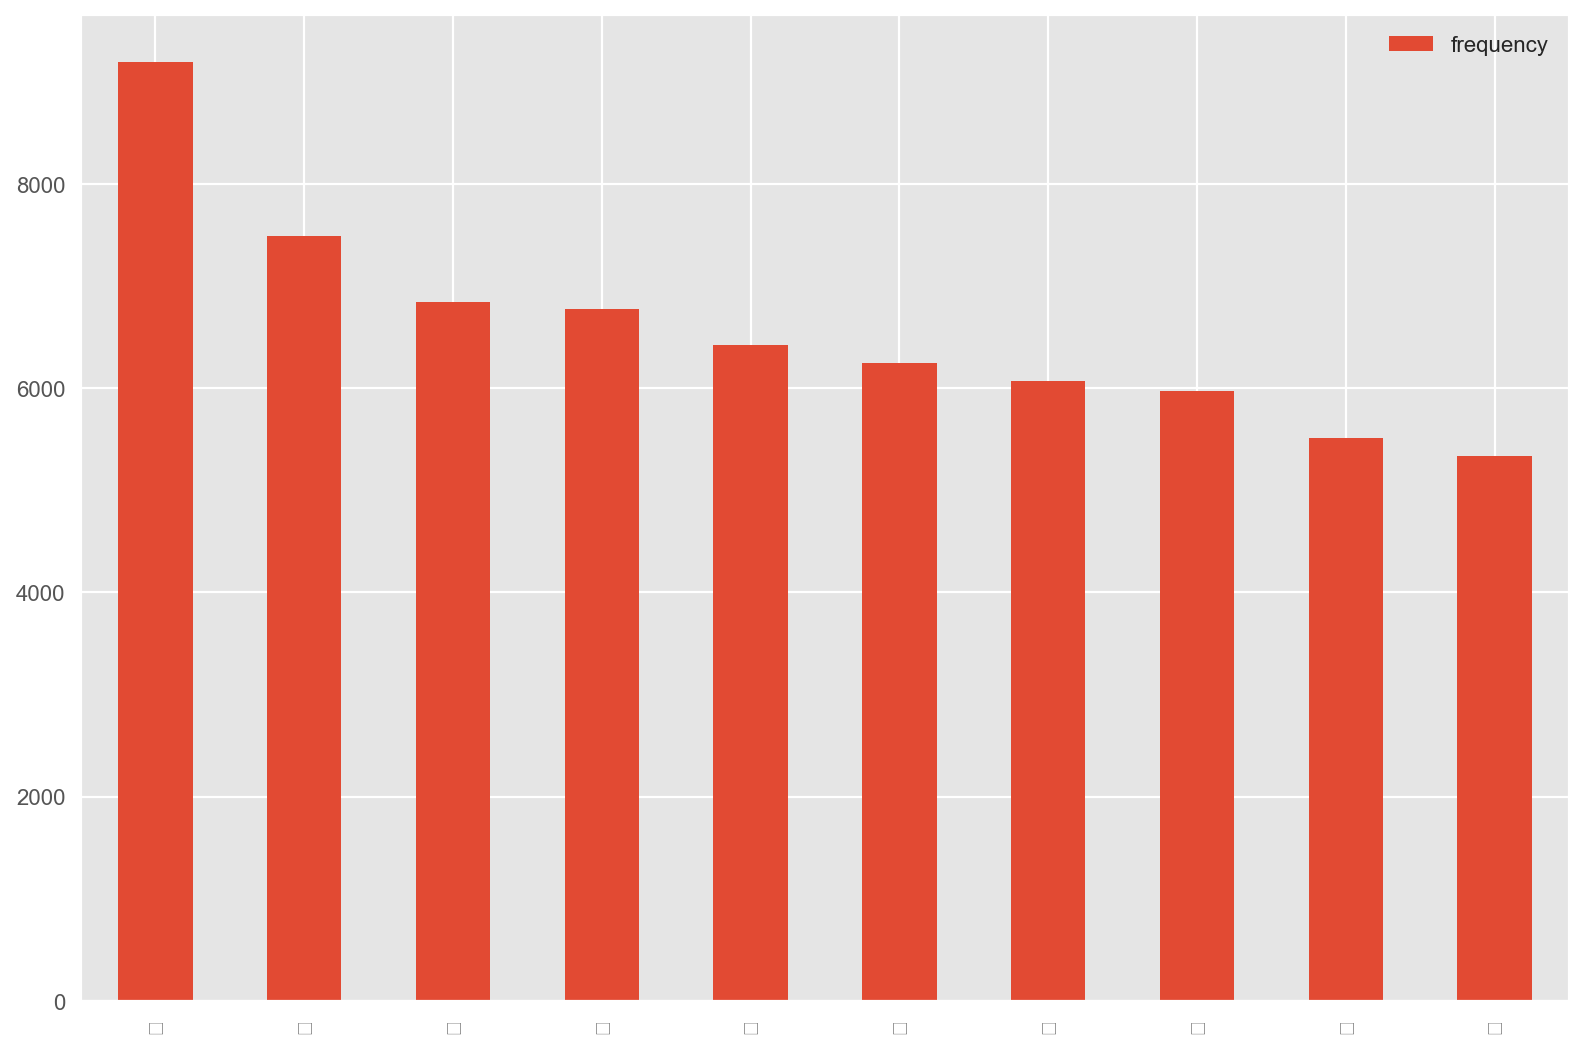

In [62]:
vcdf.head(10).plot.bar(figsize=(12, 8))

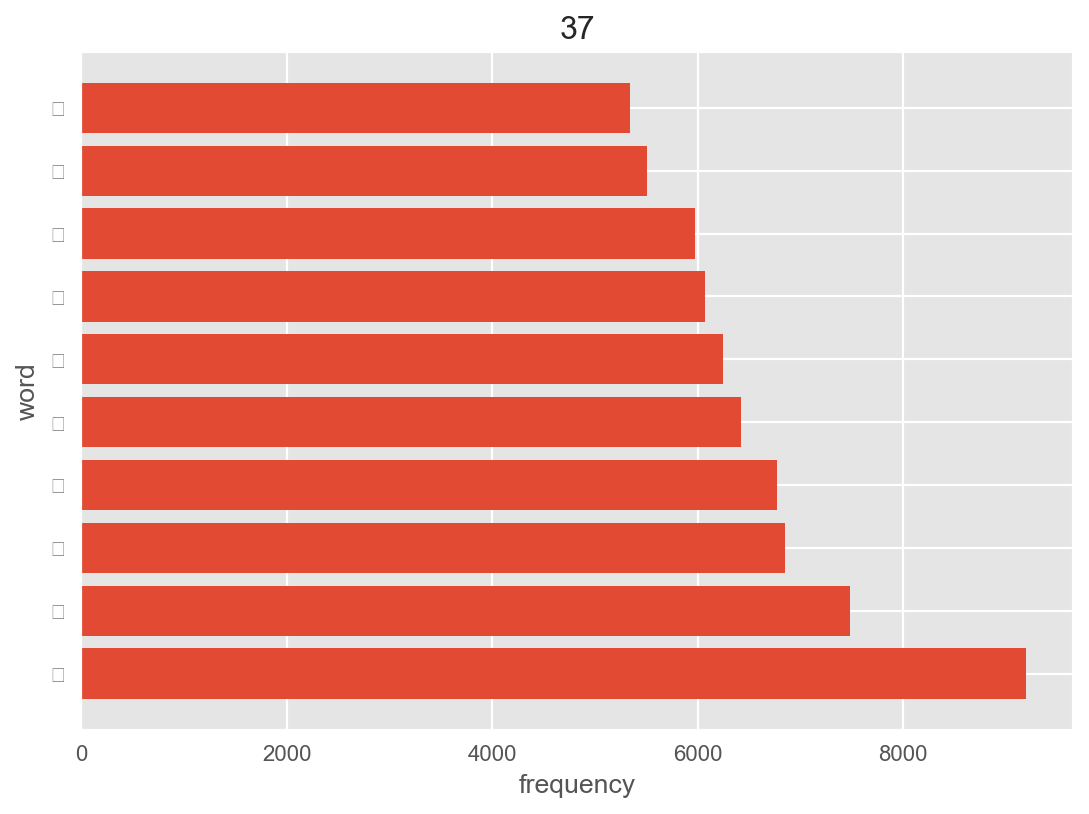

In [4]:
import numpy as np
from q30 import read_mecab
import matplotlib.pyplot as plt
from collections import Counter

word = []
count = []
word_freq = Counter(word['base'] for sent_lis in read_mecab(open('neko.txt.mecab')) 
                            for word in sent_lis)
for w, c in word_freq.most_common(10):
    word.append(w)
    count.append(c)

len_word = np.arange(len(word))
plt.barh(len_word, count, align='center')
plt.yticks(len_word, word)
plt.xlabel('frequency')
plt.ylabel('word')
plt.title('37')

- jupyter上だと日本語ラベルが表示されない。 
- jupyterを使わないとこんな感じ

![37](http://www.cl.ecei.tohoku.ac.jp/~asano/nlp100/figure_1.png)

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

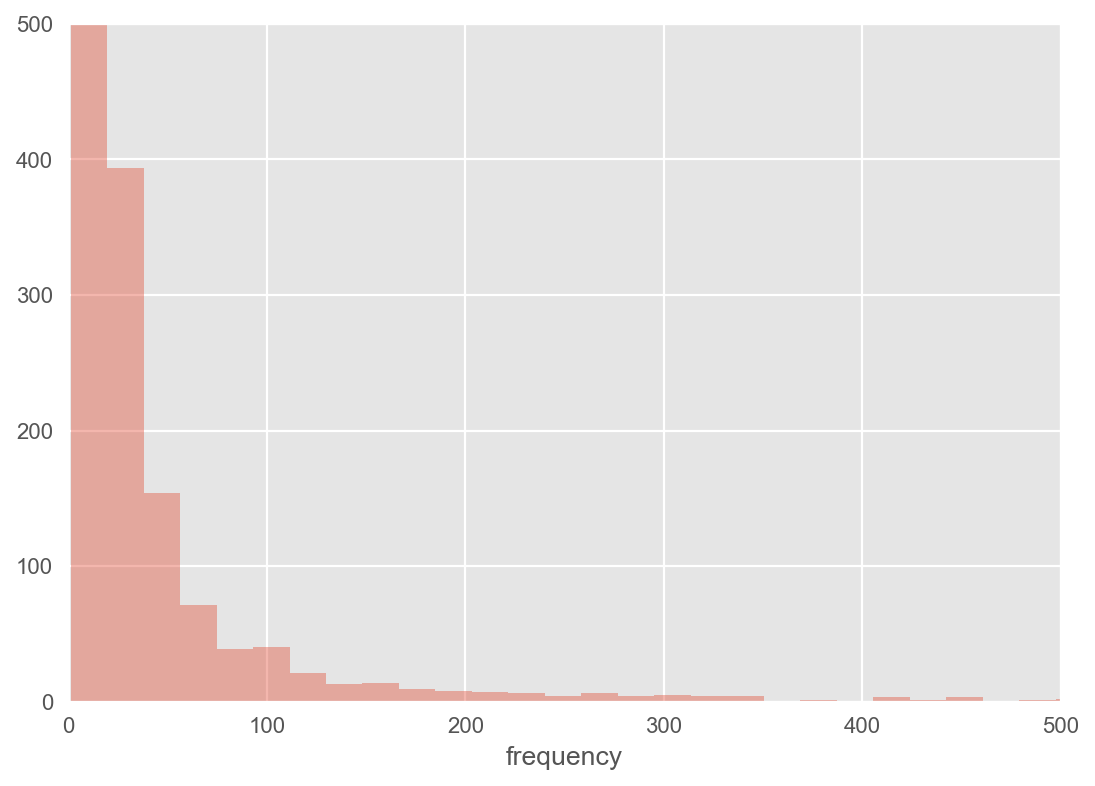

In [63]:
hist = sns.distplot(vcdf.frequency,kde=False, bins=500)
hist.set(ylim=(0, 500))
hist.set(xlim=(0, 500))
hist

(1, 30)

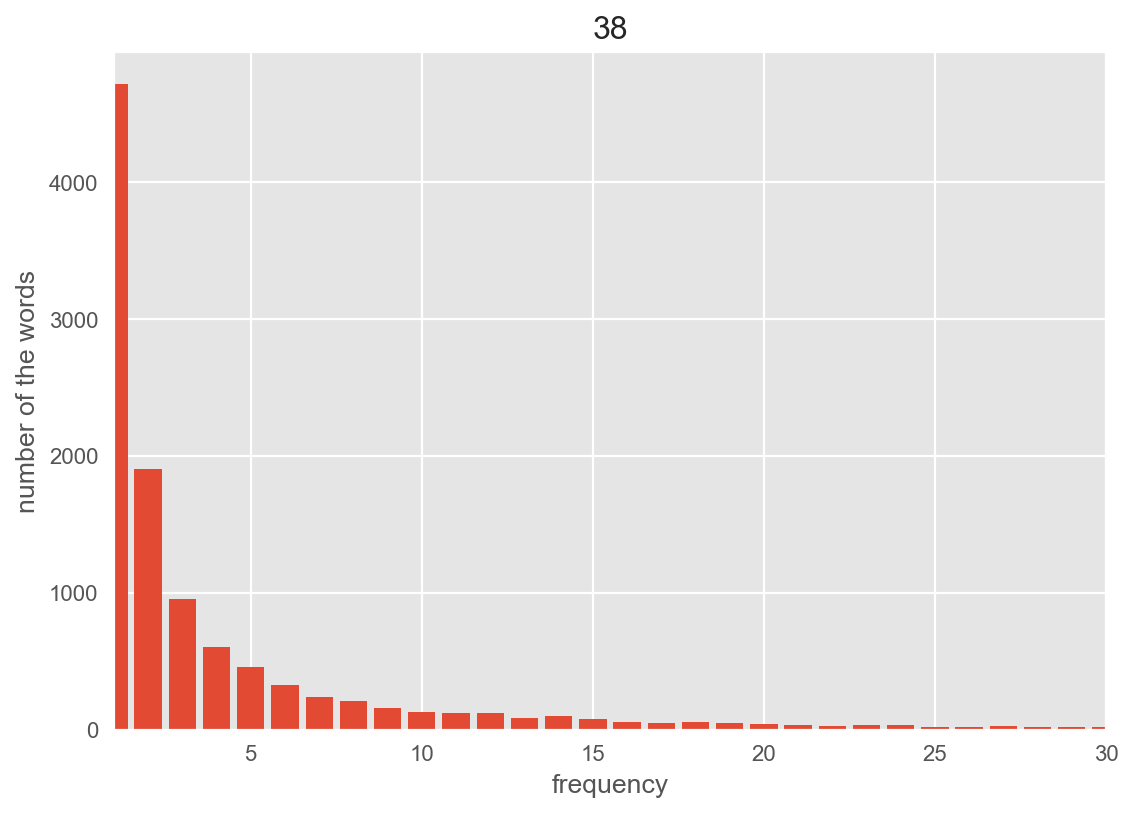

In [5]:
word_freq = Counter(word['base'] for sent_lis in read_mecab(open('neko.txt.mecab')) 
                        for word in sent_lis)
data = Counter(count for count in word_freq.values())

x = []
y = []
for w, c in Counter(data).items():
    x.append(w)
    y.append(c)

plt.bar(x, y)
plt.title("38")
plt.xlabel("frequency")
plt.ylabel("number of the words")
plt.xlim(1, 30)

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

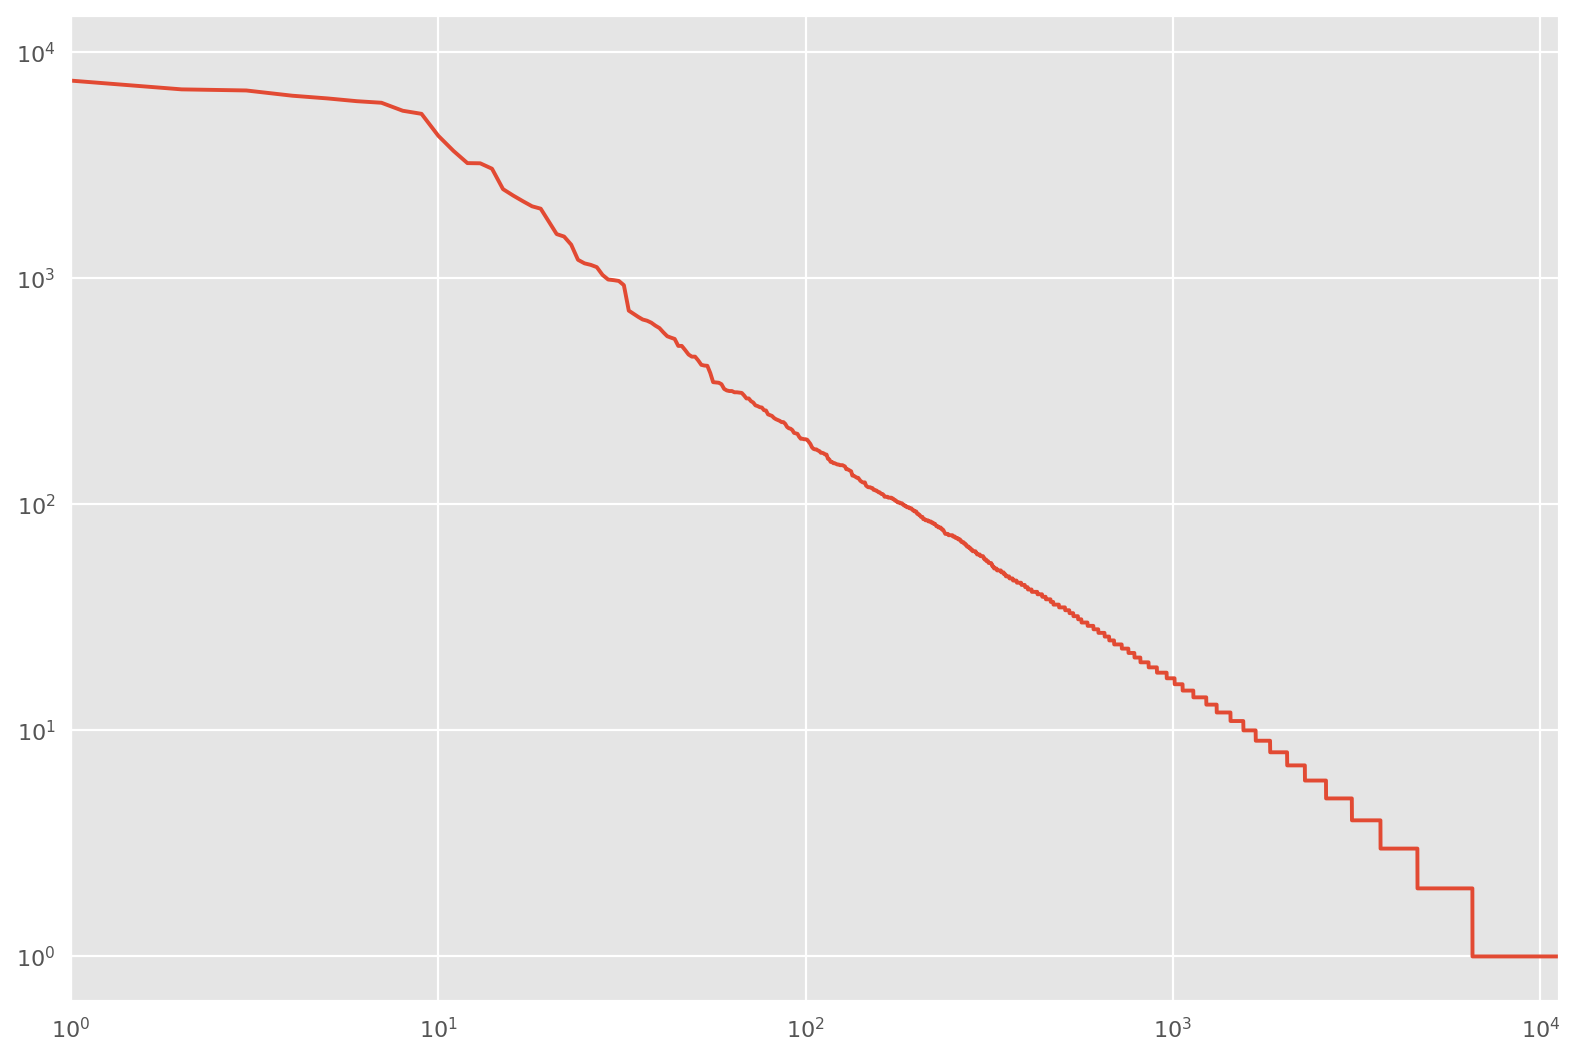

In [64]:
s = pd.Series(vc.values)
s.plot(loglog=True, figsize=(12, 8))

(1, 10000)

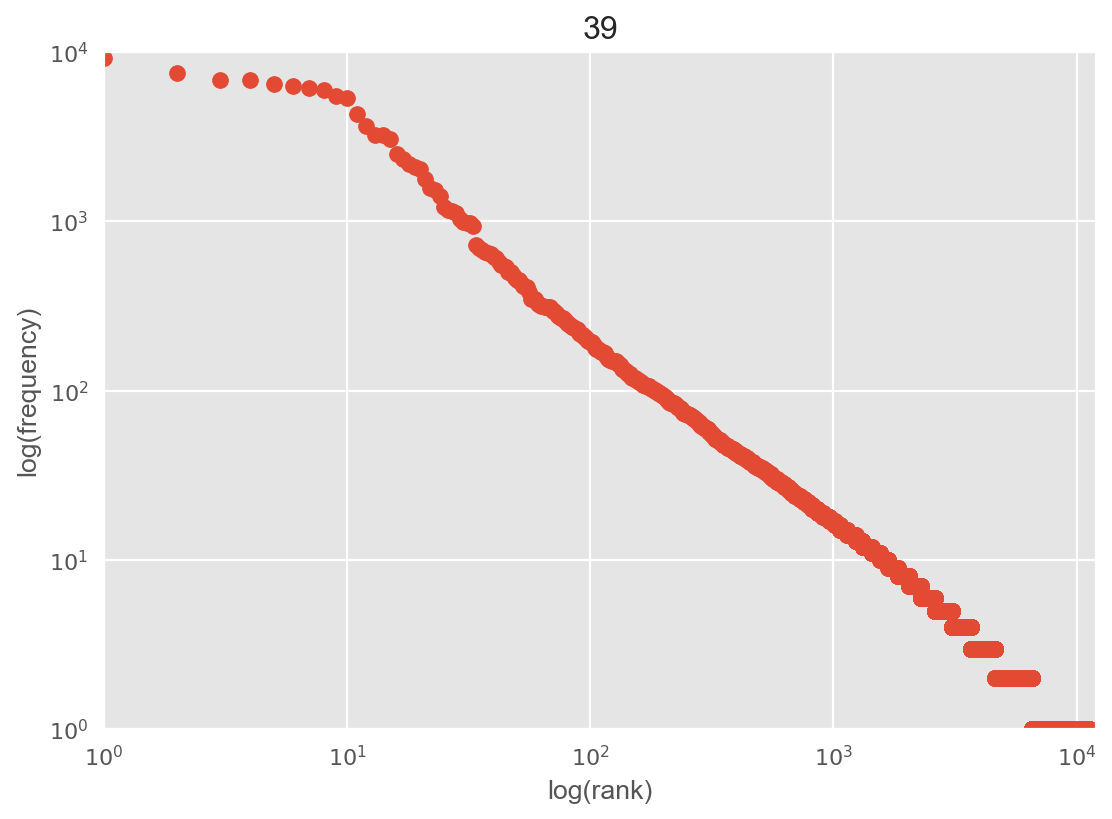

In [6]:
count = [c for _, c in word_freq.most_common()]
plt.scatter(np.arange(1, len(count)+1), count)
plt.yscale("log")
plt.xscale("log")
plt.title("39")
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.xlim(1, 12000)
plt.ylim(1, 10000)